In [2]:
#imports
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as st
import quandl
from quandl_apitoken import api_key

In [3]:
#quandl api pulls
try:
    copper_download = quandl.get("CHRIS/CME_HG2", authtoken=api_key)
    gold_download = quandl.get("CHRIS/CME_GC2", authtoken=api_key)
    SP500_download = quandl.get("CHRIS/CME_ES2", authtoken=api_key)
    
    copper_download.to_csv("copper_2nd.csv")
    gold_download.to_csv("gold_2nd.csv")
    SP500_download.to_csv("SP500_2nd.csv")
    

except Exception as e:
    print(e)

In [4]:
#convert to csv for df
csv_file = os.path.join("copper_2nd.csv")
copper_raw_df = pd.read_csv(csv_file)
copper_raw_df.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1959-10-29,0.3240,0.3240,0.3190,0.3240,NaN,0.3240,79.0,582.0
1,1959-10-30,0.3215,0.3278,0.3210,0.3215,NaN,0.3215,100.0,592.0
2,1959-11-02,0.3230,0.3230,0.3180,0.3230,NaN,0.3230,88.0,587.0
3,1959-11-04,0.3300,0.3307,0.3259,0.3300,NaN,0.3300,135.0,577.0
4,1959-11-05,0.3310,0.3340,0.3310,0.3310,NaN,0.3310,161.0,617.0


In [5]:
#csv to df
SP500 = 'SP500_2nd.csv'
SP500_df= pd.read_csv(SP500)

SP500_df.tail()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
5792,2020-06-12,3000.75,3076.75,2971.00,3024.50,24.25,3023.75,2715442.0,414547.0
5793,2020-06-15,2983.25,3068.25,2923.75,3065.50,38.25,3062.00,2958270.0,906306.0
5794,2020-06-16,3065.25,3156.25,3060.25,3116.00,56.25,3118.25,2979960.0,1678383.0
5795,2020-06-17,3111.75,3147.00,3094.50,3106.50,11.25,3107.00,1829020.0,2179528.0
5796,2020-06-18,3104.00,3120.00,3064.50,3099.25,9.00,3098.00,1617572.0,2436145.0


In [6]:
SP500_df = SP500_df.sort_index(axis=0, ascending=True)
SP500_df.drop(SP500_df.columns[[8]], axis=1, inplace=True)
SP500_df.head()


,Date,Open,High,Low,Last,Change,Settle,Volume
0,1997-09-09,943.50,951.00,941.50,944.00,NaN,944.00,896.0
1,1997-09-10,942.75,943.25,917.00,925.00,NaN,925.00,12261.0
2,1997-09-11,924.00,929.75,910.25,918.25,NaN,918.25,9759.0
3,1997-09-12,918.00,936.50,913.50,933.75,NaN,933.75,18496.0
4,1997-09-15,933.50,939.75,929.00,931.50,NaN,931.50,11749.0


In [7]:
#calc daily return on SP
sp500_percent_return = []
previous_price = 943.5
for index , row in SP500_df.iterrows():
    Settle_row = row["Settle"]
    dailySP500_return = (Settle_row - previous_price) / previous_price *100
    sp500_percent_return.append(round(dailySP500_return, 2))
    previous_price = Settle_row
SP500_df.insert(1,"SP_Daily_Pct_Return", sp500_percent_return)



In [8]:
SP500_df["Date"] = pd.to_datetime(SP500_df["Date"])

In [9]:
#filter sp df
SP_dates = SP500_df.loc[(SP500_df["Date"] >= "1996-12-31") & 
                                   (SP500_df["Date"] <= "2020-06-10")]
SP_dates.head()

,Date,SP_Daily_Pct_Return,Open,High,Low,Last,Change,Settle,Volume
0,1997-09-09,0.05,943.50,951.00,941.50,944.00,NaN,944.00,896.0
1,1997-09-10,-2.01,942.75,943.25,917.00,925.00,NaN,925.00,12261.0
2,1997-09-11,-0.73,924.00,929.75,910.25,918.25,NaN,918.25,9759.0
3,1997-09-12,1.69,918.00,936.50,913.50,933.75,NaN,933.75,18496.0
4,1997-09-15,-0.24,933.50,939.75,929.00,931.50,NaN,931.50,11749.0


In [10]:
#calc sp MA
SP_dates['SP_MA'] = SP_dates.rolling(55).mean()['SP_Daily_Pct_Return']
SP_dates.tail()

C:\Users\bruce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,SP_Daily_Pct_Return,Open,High,Low,Last,Change,Settle,Volume,SP_MA
5786,2020-06-04,-0.22,3106.75,3115.75,3077.00,3103.0,6.75,3099.75,31864.0,0.435818
5787,2020-06-05,2.48,3102.25,3199.75,3096.00,3175.0,76.75,3176.50,56532.0,0.542364
5788,2020-06-08,1.27,3181.50,3220.50,3173.00,3215.5,40.25,3216.75,89946.0,0.574909
5789,2020-06-09,-0.69,3216.00,3220.00,3179.00,3194.5,22.25,3194.50,92923.0,0.638909
5790,2020-06-10,-0.59,3194.25,3216.75,3168.75,3173.5,19.00,3175.50,160381.0,0.688000


In [11]:
#csv to df
copper = 'copper_2nd.csv'
copper_df = pd.read_csv(copper)
print(copper_df.shape)


(9991, 9)


In [12]:
gold = 'gold_2nd.csv'
gold_df = pd.read_csv(gold)
print(copper_df.shape)


(9991, 9)


In [13]:
#merge copper gold
copp_gold_df = pd.merge(gold_df, copper_df, on=["Date"])
copp_gold_df.head()


,Date,Open_x,High_x,Low_x,Last_x,Change_x,Settle_x,Volume_x,Previous Day Open Interest_x,Open_y,High_y,Low_y,Last_y,Change_y,Settle_y,Volume_y,Previous Day Open Interest_y
0,1975-09-26,136.1,139.3,136.1,139.0,NaN,139.0,972.0,4713.0,0.573,0.581,0.573,0.580,NaN,0.580,51.0,2174.0
1,1975-09-29,138.2,141.3,138.2,139.8,NaN,139.8,1012.0,4626.0,0.578,0.578,0.575,0.575,NaN,0.575,78.0,2179.0
2,1975-09-30,141.5,143.9,141.5,142.2,NaN,142.2,947.0,4556.0,0.572,0.579,0.571,0.571,NaN,0.571,35.0,2169.0
3,1975-10-01,145.0,145.8,143.6,144.2,NaN,144.2,1153.0,4510.0,0.575,0.575,0.571,0.572,NaN,0.572,99.0,2151.0
4,1975-10-02,145.0,146.2,142.5,143.4,NaN,143.4,1159.0,4254.0,0.570,0.570,0.567,0.568,NaN,0.568,20.0,2144.0


In [14]:
#refine new df
copp_gold_df = pd.DataFrame({
    "Date": copp_gold_df["Date"],
    "Gold_Price": copp_gold_df["Settle_x"],
    "Copper_Price": copp_gold_df["Settle_y"]
})
copp_gold_df

,Date,Gold_Price,Copper_Price
0,1975-09-26,139.0,0.5800
1,1975-09-29,139.8,0.5750
2,1975-09-30,142.2,0.5710
3,1975-10-01,144.2,0.5720
4,1975-10-02,143.4,0.5680
...,...,...,...
8684,2020-06-12,1737.3,2.6000
8685,2020-06-15,1727.2,2.5670
8686,2020-06-16,1736.5,2.5645
8687,2020-06-17,1735.6,2.5895


In [15]:
#corr of copper gold prices
copp_gold_df_corr = st.pearsonr(copp_gold_df["Gold_Price"],copp_gold_df["Copper_Price"])[0]
print(copp_gold_df_corr)

0.8648693237784647


In [16]:
#copper gold ratio calc
gold_copp_ratio = (copp_gold_df["Copper_Price"] / copp_gold_df["Gold_Price"])

In [17]:
copp_gold_df.insert(3,"GoldCopperRatio", gold_copp_ratio)
copp_gold_df.tail()                                       


,Date,Gold_Price,Copper_Price,GoldCopperRatio
8684,2020-06-12,1737.3,2.6000,0.001497
8685,2020-06-15,1727.2,2.5670,0.001486
8686,2020-06-16,1736.5,2.5645,0.001477
8687,2020-06-17,1735.6,2.5895,0.001492
8688,2020-06-18,1731.1,2.5880,0.001495


In [18]:
copp_gold_df = copp_gold_df.sort_index(axis=0, ascending=True)
copp_gold_df.head()


,Date,Gold_Price,Copper_Price,GoldCopperRatio
0,1975-09-26,139.0,0.580,0.004173
1,1975-09-29,139.8,0.575,0.004113
2,1975-09-30,142.2,0.571,0.004015
3,1975-10-01,144.2,0.572,0.003967
4,1975-10-02,143.4,0.568,0.003961


In [19]:
#calc daily chg in CGr
copp_gold_percent_chg = []
previous_price = .002849
for index , row in copp_gold_df.iterrows():
    GcR_row = row["GoldCopperRatio"]
    GcR_daily_pctchg = (GcR_row - previous_price) / previous_price *100
    copp_gold_percent_chg.append(round(GcR_daily_pctchg, 2))
    previous_price = GcR_row
copp_gold_df.insert(1,"Gold-Copp_Dly_Ret", copp_gold_percent_chg)
copp_gold_df.tail()



,Date,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio
8684,2020-06-12,0.67,1737.3,2.6000,0.001497
8685,2020-06-15,-0.69,1727.2,2.5670,0.001486
8686,2020-06-16,-0.63,1736.5,2.5645,0.001477
8687,2020-06-17,1.03,1735.6,2.5895,0.001492
8688,2020-06-18,0.20,1731.1,2.5880,0.001495


In [20]:
copp_gold_df.head()

,Date,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio
0,1975-09-26,46.46,139.0,0.580,0.004173
1,1975-09-29,-1.43,139.8,0.575,0.004113
2,1975-09-30,-2.37,142.2,0.571,0.004015
3,1975-10-01,-1.21,144.2,0.572,0.003967
4,1975-10-02,-0.15,143.4,0.568,0.003961


In [21]:
copp_gold_df["Date"] = pd.to_datetime(copp_gold_df["Date"])

In [22]:
#filter CGr df
copp_gold_dates_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1998-06-09") & 
                                   (copp_gold_df["Date"] <= "2020-06-10")]

copp_gold_dates_df

,Date,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio
3207,1998-06-09,0.78,295.5,0.7635,0.002584
3208,1998-06-10,2.37,295.1,0.7805,0.002645
3209,1998-06-11,-0.01,288.7,0.7635,0.002645
3210,1998-06-12,-0.76,287.3,0.7540,0.002624
3211,1998-06-15,-2.55,286.6,0.7330,0.002558
...,...,...,...,...,...
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441
8679,2020-06-05,5.36,1683.0,2.5555,0.001518
8680,2020-06-08,-0.91,1705.1,2.5655,0.001505
8681,2020-06-09,0.32,1721.9,2.5990,0.001509


In [23]:
#corr of CGr daily chg and SP500 daily return
forcorr_df = pd.merge(copp_gold_dates_df, SP_dates, on=["Date"])
SP_GCr_corr = st.pearsonr(forcorr_df["Gold-Copp_Dly_Ret"],forcorr_df["SP_Daily_Pct_Return"])[0]
print(SP_GCr_corr)

0.26197788030145264


In [24]:
#rolling avg CGr daily chg
copp_gold_dates_df['MA'] = copp_gold_dates_df.rolling(55).mean()['Gold-Copp_Dly_Ret']
copp_gold_dates_df.tail(5)

C:\Users\bruce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio,MA
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441,-0.066545
8679,2020-06-05,5.36,1683.0,2.5555,0.001518,0.102545
8680,2020-06-08,-0.91,1705.1,2.5655,0.001505,0.056909
8681,2020-06-09,0.32,1721.9,2.5990,0.001509,0.080727
8682,2020-06-10,2.28,1720.7,2.6565,0.001544,0.275091


In [25]:
#rolling std CGr daily chg
copp_gold_dates_df['rolling_std'] = copp_gold_dates_df.rolling(55).std()['Gold-Copp_Dly_Ret']
copp_gold_dates_df.tail(5)

C:\Users\bruce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio,MA,rolling_std
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441,-0.066545,2.343876
8679,2020-06-05,5.36,1683.0,2.5555,0.001518,0.102545,2.394182
8680,2020-06-08,-0.91,1705.1,2.5655,0.001505,0.056909,2.389027
8681,2020-06-09,0.32,1721.9,2.5990,0.001509,0.080727,2.384922
8682,2020-06-10,2.28,1720.7,2.6565,0.001544,0.275091,2.098548


In [26]:
SP_filter_df = SP_dates.loc[(SP_dates["Date"] >= "1998-06-11") & 
                                   (SP_dates["Date"] <= "2020-06-10")]
SP_filter_df.head()

,Date,SP_Daily_Pct_Return,Open,High,Low,Last,Change,Settle,Volume,SP_MA
192,1998-06-11,-1.67,1124.25,1128.25,1103.00,1105.25,NaN,1105.25,17376.0,-0.036364
193,1998-06-12,0.57,1103.50,1113.50,1091.75,1111.50,NaN,1111.50,19156.0,-0.010000
194,1998-06-15,-2.29,1112.25,1114.25,1084.00,1086.00,NaN,1086.00,19159.0,-0.064545
195,1998-06-16,1.29,1085.00,1100.50,1082.75,1100.00,NaN,1100.00,20631.0,-0.025455
196,1998-06-17,2.07,1099.25,1126.75,1098.50,1122.75,NaN,1122.75,17820.0,0.020727


In [27]:
CGr_filter_df = copp_gold_dates_df.loc[(copp_gold_dates_df["Date"] >= "1998-06-11") & 
                                   (copp_gold_dates_df["Date"] <= "2020-06-10")]
CGr_filter_df.head()

,Date,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio,MA,rolling_std
3209,1998-06-11,-0.01,288.7,0.7635,0.002645,NaN,NaN
3210,1998-06-12,-0.76,287.3,0.7540,0.002624,NaN,NaN
3211,1998-06-15,-2.55,286.6,0.7330,0.002558,NaN,NaN
3212,1998-06-16,-0.84,290.0,0.7355,0.002536,NaN,NaN
3213,1998-06-17,0.14,294.9,0.7490,0.002540,NaN,NaN


NameError: name 'line3' is not defined

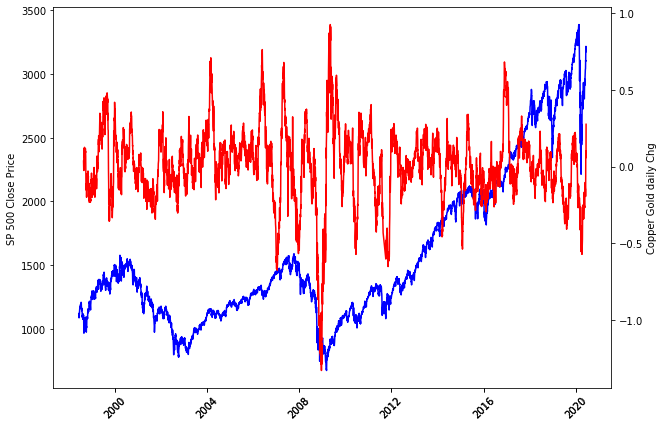

In [28]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP_filter_df['Date'], SP_filter_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(CGr_filter_df['Date'],CGr_filter_df['MA'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(CGr_filter_df['Date'],CGr_filter_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2+line3), ("SP 500 Close Price", "Gold Copper Daily Chg MA", "GoldCopp Rolling Std"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("Jan 2017 to Pres - SP 500 Close Price vs.Copper Gold Metrics")
plt.xlabel("Date")
plt.grid(alpha=1)
# fig1.savefig("Jan 2017 to Pres. vs Gold Copper daily ret metrics")
plt.show()

C:\Users\bruce\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


NameError: name 'line3' is not defined

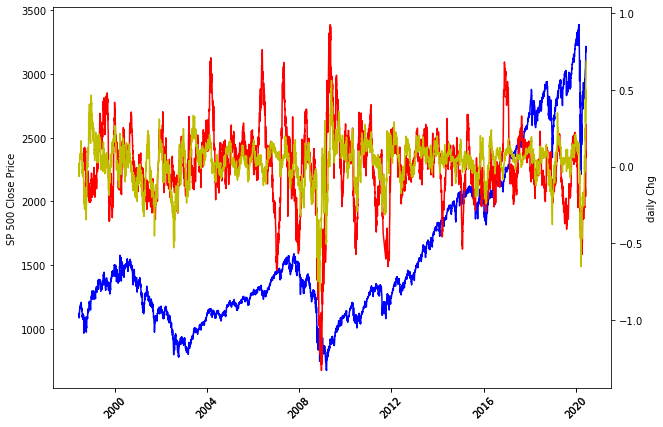

In [29]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP_filter_df['Date'], SP_filter_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(CGr_filter_df['Date'],CGr_filter_df['MA'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line4= ax2.plot(SP_filter_df['Date'],SP_filter_df['SP_MA'], "y-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("daily Chg")

ax1.legend((line1+line2+line3+line4), ("SP 500 Close Price", "Gold Copper Daily Chg MA", "GoldCopp Rolling Std", "SP500 daily % MA"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("SP500 Cgr Metrics")
plt.xlabel("Date")
plt.grid(alpha=1)
# fig1.savefig("Jan 2017 to Pres. vs Gold Copper daily ret metrics")
plt.show()

In [30]:
# Rolling Correlation
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = forcorr_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(forcorr_df['Gold-Copp_Dly_Ret'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
# print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )
# correl.tail()
lower_correl.tail()


5470    0.059577
5471    0.062634
5472    0.066235
5473    0.071039
5474    0.068468
dtype: float64

In [31]:
forcorr_df.tail()

,Date,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio,SP_Daily_Pct_Return,Open,High,Low,Last,Change,Settle,Volume,SP_MA
5470,2020-06-04,-1.23,1727.4,2.4895,0.001441,-0.22,3106.75,3115.75,3077.00,3103.0,6.75,3099.75,31864.0,0.435818
5471,2020-06-05,5.36,1683.0,2.5555,0.001518,2.48,3102.25,3199.75,3096.00,3175.0,76.75,3176.50,56532.0,0.542364
5472,2020-06-08,-0.91,1705.1,2.5655,0.001505,1.27,3181.50,3220.50,3173.00,3215.5,40.25,3216.75,89946.0,0.574909
5473,2020-06-09,0.32,1721.9,2.5990,0.001509,-0.69,3216.00,3220.00,3179.00,3194.5,22.25,3194.50,92923.0,0.638909
5474,2020-06-10,2.28,1720.7,2.6565,0.001544,-0.59,3194.25,3216.75,3168.75,3173.5,19.00,3175.50,160381.0,0.688000


In [32]:
SP_GCR_corr_df = pd.merge(SP500_df, copp_gold_df, on=["Date"])
SP_GCR_corr = st.pearsonr(SP_GCR_corr_df["SP_Daily_Pct_Return"],SP_GCR_corr_df["Gold-Copp_Dly_Ret"])[0]
print(SP_GCR_corr)

0.2568594465957107


In [33]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = SP_GCR_corr_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(SP_GCR_corr_df['Gold-Copp_Dly_Ret'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5663    0.131858
5664    0.132827
5665    0.134341
5666    0.136616
5667    0.141022
Length: 5668, dtype: float64


In [34]:
#compile CGr stats for signal
summary_df = pd.DataFrame({'Date': SP_GCR_corr_df['Date'],
                                      'dly_chg_correlation': correl,
                                      'dly_chg_corr_mean': correl_mean,
                                      'Std_daily_chg_correl':std_correl,
                                      'upper_correl': upper_correl,
                                      'lower_correl':lower_correl})

summary_df = summary_df.loc[(SP_dates["Date"] >= "1998-04-15") & 
                                   (SP_dates["Date"] <= "2020-06-10")]


summary_df.head(150)

,Date,dly_chg_correlation,dly_chg_corr_mean,Std_daily_chg_correl,upper_correl,lower_correl
152,1998-04-20,0.011009,-0.033064,0.048754,0.064444,-0.130572
153,1998-04-21,-0.006357,-0.032348,0.048854,0.065359,-0.130055
154,1998-04-22,0.016310,-0.031263,0.049265,0.067268,-0.129794
155,1998-04-23,0.030037,-0.029908,0.049915,0.069923,-0.129739
156,1998-04-24,0.045383,-0.028229,0.050875,0.073521,-0.129979
...,...,...,...,...,...,...
297,1998-11-12,0.382866,0.363025,0.051947,0.466919,0.259132
298,1998-11-13,0.494902,0.368822,0.048365,0.465551,0.272093
299,1998-11-16,0.495549,0.374434,0.044627,0.463687,0.285181
300,1998-11-17,0.519461,0.380043,0.043061,0.466165,0.293921


In [35]:
#signal showing point above below 2std and setting rest to 0
def my_signal(row):
    if row['dly_chg_correlation']> row ['upper_correl']:
        return row['dly_chg_correlation'] - row['upper_correl']
    elif row['dly_chg_correlation'] < row['lower_correl']:
        return row['dly_chg_correlation'] - row['lower_correl']
    else:
        return 0
    
summary_df['signal'] = summary_df.apply(my_signal, axis=1)
summary_df    


,Date,dly_chg_correlation,dly_chg_corr_mean,Std_daily_chg_correl,upper_correl,lower_correl,signal
152,1998-04-20,0.011009,-0.033064,0.048754,0.064444,-0.130572,0.000000
153,1998-04-21,-0.006357,-0.032348,0.048854,0.065359,-0.130055,0.000000
154,1998-04-22,0.016310,-0.031263,0.049265,0.067268,-0.129794,0.000000
155,1998-04-23,0.030037,-0.029908,0.049915,0.069923,-0.129739,0.000000
156,1998-04-24,0.045383,-0.028229,0.050875,0.073521,-0.129979,0.000000
...,...,...,...,...,...,...,...
5663,2020-06-12,0.178245,0.131858,0.029353,0.190563,0.073152,0.000000
5664,2020-06-15,0.242373,0.132827,0.032034,0.196896,0.068758,0.045477
5665,2020-06-16,0.255652,0.134341,0.035697,0.205735,0.062947,0.049917
5666,2020-06-17,0.284493,0.136616,0.040925,0.218466,0.054765,0.066027


In [36]:
summary_df

,Date,dly_chg_correlation,dly_chg_corr_mean,Std_daily_chg_correl,upper_correl,lower_correl,signal
152,1998-04-20,0.011009,-0.033064,0.048754,0.064444,-0.130572,0.000000
153,1998-04-21,-0.006357,-0.032348,0.048854,0.065359,-0.130055,0.000000
154,1998-04-22,0.016310,-0.031263,0.049265,0.067268,-0.129794,0.000000
155,1998-04-23,0.030037,-0.029908,0.049915,0.069923,-0.129739,0.000000
156,1998-04-24,0.045383,-0.028229,0.050875,0.073521,-0.129979,0.000000
...,...,...,...,...,...,...,...
5663,2020-06-12,0.178245,0.131858,0.029353,0.190563,0.073152,0.000000
5664,2020-06-15,0.242373,0.132827,0.032034,0.196896,0.068758,0.045477
5665,2020-06-16,0.255652,0.134341,0.035697,0.205735,0.062947,0.049917
5666,2020-06-17,0.284493,0.136616,0.040925,0.218466,0.054765,0.066027


In [37]:
# print(summary_df.isnull().sum())
# final_df.dropna(inplace=True)
# print(final_df.isnull().sum())
# final_df

In [38]:
#clean up df
summary2_df = pd.merge(SP_filter_df, summary_df, on=["Date"])
summary3_df = pd.merge(summary2_df, CGr_filter_df, on=["Date"])
summary3_df.tail(5)

,Date,SP_Daily_Pct_Return,Open,High,Low,Last,Change,Settle,Volume,SP_MA,...,Std_daily_chg_correl,upper_correl,lower_correl,signal,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio,MA,rolling_std
5468,2020-06-04,-0.22,3106.75,3115.75,3077.00,3103.0,6.75,3099.75,31864.0,0.435818,...,0.042730,0.230498,0.059577,0.000000,-1.23,1727.4,2.4895,0.001441,-0.066545,2.343876
5469,2020-06-05,2.48,3102.25,3199.75,3096.00,3175.0,76.75,3176.50,56532.0,0.542364,...,0.040072,0.222922,0.062634,0.000000,5.36,1683.0,2.5555,0.001518,0.102545,2.394182
5470,2020-06-08,1.27,3181.50,3220.50,3173.00,3215.5,40.25,3216.75,89946.0,0.574909,...,0.037190,0.214997,0.066235,0.000000,-0.91,1705.1,2.5655,0.001505,0.056909,2.389027
5471,2020-06-09,-0.69,3216.00,3220.00,3179.00,3194.5,22.25,3194.50,92923.0,0.638909,...,0.033527,0.205148,0.071039,0.000000,0.32,1721.9,2.5990,0.001509,0.080727,2.384922
5472,2020-06-10,-0.59,3194.25,3216.75,3168.75,3173.5,19.00,3175.50,160381.0,0.688000,...,0.032378,0.197978,0.068468,-0.059125,2.28,1720.7,2.6565,0.001544,0.275091,2.098548


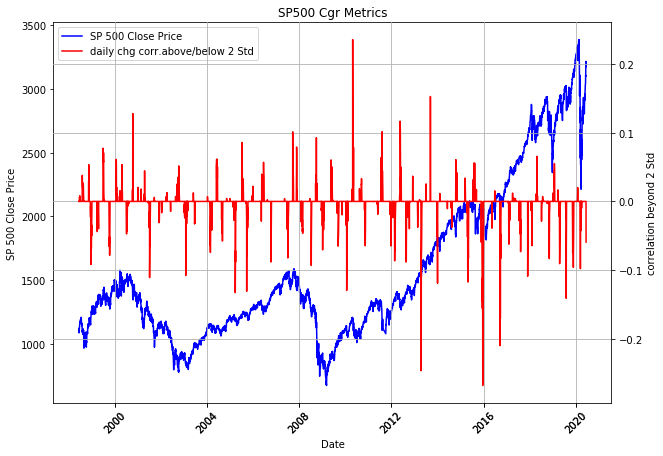

In [39]:
#plot signal chart

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(summary3_df['Date'], summary3_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line2= ax2.plot(summary3_df['Date'],summary3_df['MA'], "r-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line4= ax2.plot(summary3_df['Date'],summary3_df['SP_MA'], "y-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")



# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line5= ax2.plot(summary3_df['Date'],summary3_df['upper_correl'], "m-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")


# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line6= ax2.plot(summary3_df['Date'],summary3_df['lower_correl'], "m-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(summary3_df['Date'],summary3_df['signal'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("correlation beyond 2 Std")


ax1.legend((line1+line2), ("SP 500 Close Price", "daily chg corr.above/below 2 Std"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("SP500 Cgr Metrics")
plt.xlabel("Date")
plt.grid(alpha=1)
# fig1.savefig("Jan 2017 to Pres. vs Gold Copper daily ret metrics")



plt.show()

In [40]:
summary3_df.to_csv('jun98tojun20.csv', encoding='utf-8')

In [91]:
Period = ["1998-6-15","2000-6-15","2002-6-15","2004-6-15","2006-6-15","2008-6-15","2010-6-15","2012-6-15","2014-6-15",
          "2016-6-15","2018-6-15","2020-6-15"]

PL = [0, 18406, 35985,27028,12319,15456,-49026,29738, 27607,41405,3865, 24098]

Ending_Capital = [ 100000, 118406,154391,181419,193738,209193,160167,189906,217513, 
 258918,262782,286881]

Per_Pct = [0,18.41,30.39,17.51,6.79,7.98,-23.44,18.57,14.54,19.04,1.49,9.17]

Ltd_Pct = [0, 18,54,81,94,109,60,90,118,159,163,187]

hit_ratio = [55,55,64,50,69,75,45,50,100,63,56,71]


In [92]:
Final_Stats_df = pd.DataFrame({"Date": Period,
                            "Period PL": PL,
                             "Ending Capital": Ending_Capital,
                               "Per_%": Per_Pct,
                               "Ltd % Ret": Ltd_Pct,
                               "Hit Ratio %": hit_ratio
                              })
Final_Stats_df["Date"] = pd.to_datetime(Final_Stats_df["Date"])
Final_Stats_df.head(12)

,Date,Period PL,Ending Capital,Per_%,Ltd % Ret,Hit Ratio %
0,1998-06-15,0,100000,0.00,0,55
1,2000-06-15,18406,118406,18.41,18,55
2,2002-06-15,35985,154391,30.39,54,64
3,2004-06-15,27028,181419,17.51,81,50
4,2006-06-15,12319,193738,6.79,94,69
5,2008-06-15,15456,209193,7.98,109,75
6,2010-06-15,-49026,160167,-23.44,60,45
7,2012-06-15,29738,189906,18.57,90,50
8,2014-06-15,27607,217513,14.54,118,100
9,2016-06-15,41405,258918,19.04,159,63


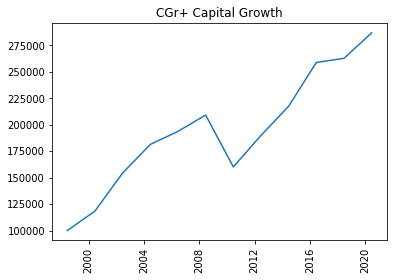

In [93]:
plt.plot(Final_Stats_df['Date'],Final_Stats_df['Ending Capital'])
plt.title("CGr+ Capital Growth")
plt.xticks(rotation = 90)
plt.show()

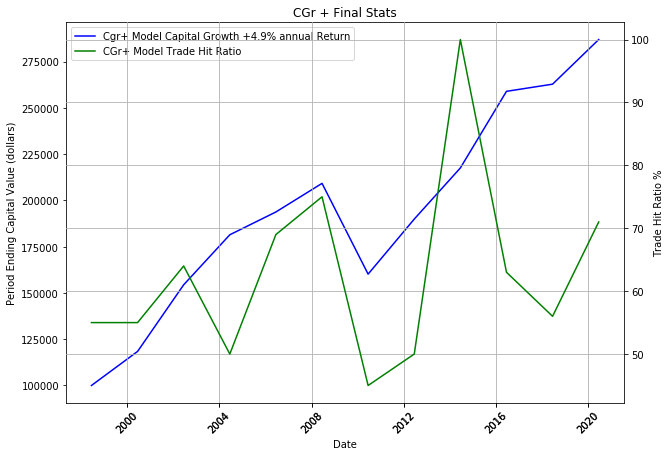

In [97]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(Final_Stats_df['Date'], Final_Stats_df['Ending Capital'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("Period Ending Capital Value (dollars)")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(Final_Stats_df['Date'],Final_Stats_df['Hit Ratio %'], "g-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Trade Hit Ratio %")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line4= ax2.plot(SP_filter_df['Date'],SP_filter_df['SP_MA'], "y-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")

ax1.legend((line1+line2), ("Cgr+ Model Capital Growth +4.9% annual Return", "CGr+ Model Trade Hit Ratio"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("CGr + Final Stats")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.savefig("CGr_Final_Stats.svg")
# fig1.savefig("CGr_Final_Stats")
plt.show()